In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from ipywidgets import interact, IntSlider

import pysof

%load_ext autoreload
%autoreload 2
%matplotlib inline

plt.style.use('ggplot')
matplotlib.rcParams['figure.figsize'] = (16.0, 8.0)
matplotlib.rcParams['font.size'] = 15

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# A Hands-on Tutorial on Image-based Identification of Structural Dynamics

## Basic experimental skills

* Camera selection
* Optical components
* Positioning
* Lighting
* Surface preperation
* Acquisiton parameters

Loading the selected video:

In [3]:
filename = r"D:\_Arhiv\_Big data\Činela\cinela4A_S_500slik.cih.cih"
filename = r"D:\_Arhiv\_Big data\Mali_02102018\data\loc_1.cih"
file = '.'.join(filename.split('.')[:-1])

File info:

In [4]:
mraw, info = pysof.load_video(filename)

In [5]:
info

OrderedDict([('Date', '2018/10/2'),
             ('Camera Type', 'FASTCAM SA-Z type 2100K-M-64GB'),
             ('Record Rate(fps)', '200000'),
             ('Shutter Speed(s)', '1/294737'),
             ('Total Frame', '200001'),
             ('Image Width', '1024'),
             ('Image Height', '48'),
             ('Color Bit', '16'),
             ('File Format', 'MRaw'),
             ('EffectiveBit Depth', '12')])

In [6]:
def show(i):
    fig, ax = plt.subplots()
    ax.imshow(mraw[i], cmap='gray')
    ax.grid(False)
    ax.grid(False)
interact(show, i=IntSlider(min=0, max=5000, step=100, start=0));

interactive(children=(IntSlider(value=0, description='i', max=5000, step=100), Output()), _dom_classes=('widge…

### Optical components, positioning
*Primer slabega fokusa, nepravokotne postavitve*

### Lighting
To optain optimal lighting conditions, histogram of pixel intensity is viewd. Uniform intensity distribution is considered as good.

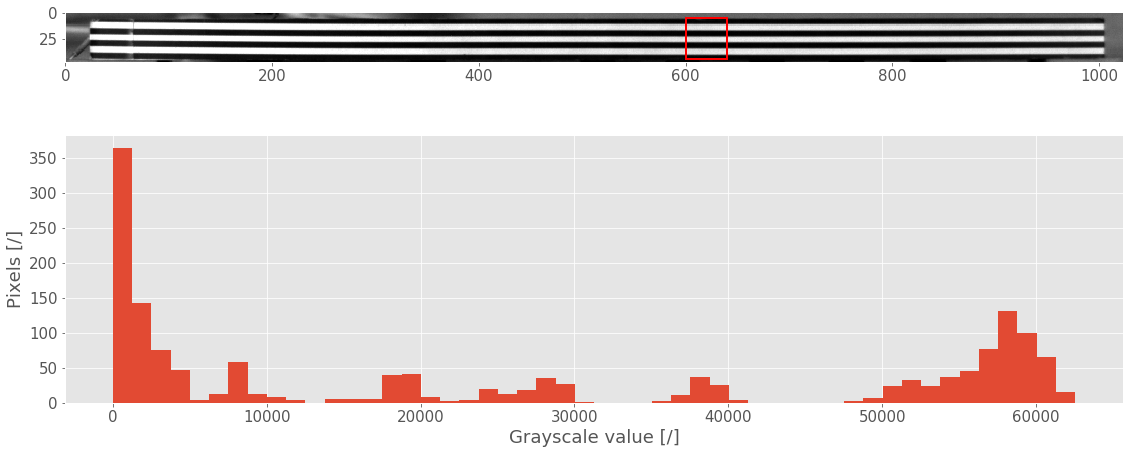

In [7]:
x0, y0, d = 600, 5, 40
roi = mraw[0, y0:y0+d, x0:x0+d]

fig, ax = plt.subplots(2)
ax[0].imshow(mraw[0], cmap='gray')
ax[1].hist(roi.flatten(), bins=50);
# Formating
ax[0].add_patch(patches.Rectangle((x0, y0), d, d, fill=False, color='r', linewidth=2))
ax[0].grid(False)
ax[1].set_xlabel('Grayscale value [/]')
ax[1].set_ylabel('Pixels [/]')
plt.tight_layout()

### Surface preperation

In [8]:
grad0, grad1 = np.gradient(mraw[0].astype(float))
x0 = 200

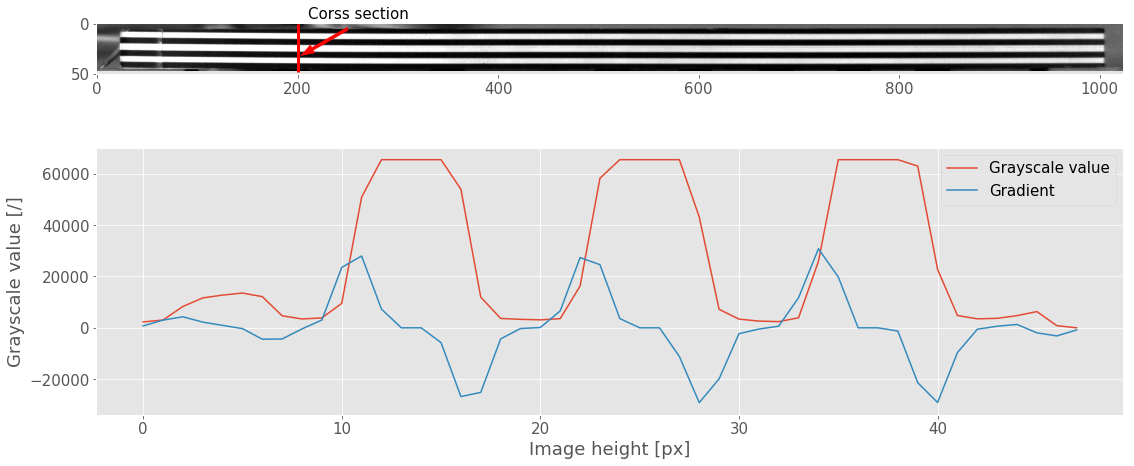

In [9]:
fig, ax = plt.subplots(2)
ax[0].imshow(mraw[0], cmap='gray')
ax[1].plot(mraw[0, :, x0], label='Grayscale value')
ax[1].plot(grad0[:, x0], label='Gradient')
# Formating
ax[0].vlines(x0, 0, 48, colors='r', linewidth=3)
ax[0].text(x0+10, -5, 'Corss section')
ax[0].arrow(x0+50, 5, -35, 20, color='r', width=3)
ax[0].grid(False)
ax[1].set_xlabel('Image height [px]')
ax[1].set_ylabel('Grayscale value [/]')
plt.legend()
plt.tight_layout()

### Other parameters

In [10]:
info

OrderedDict([('Date', '2018/10/2'),
             ('Camera Type', 'FASTCAM SA-Z type 2100K-M-64GB'),
             ('Record Rate(fps)', '200000'),
             ('Shutter Speed(s)', '1/294737'),
             ('Total Frame', '200001'),
             ('Image Width', '1024'),
             ('Image Height', '48'),
             ('Color Bit', '16'),
             ('File Format', 'MRaw'),
             ('EffectiveBit Depth', '12')])

## Simplified Optical-flow Method

Basic formulation:
$$
s(x_j,y_k,t)=\frac{I_0(x_j,y_k)-I(x_j,y_k,t)}{|\nabla I_0|}
$$

In [11]:
reference_image = np.average(mraw[:500], axis=0)

In [12]:
grad0, grad1 = np.gradient(reference_image)

In [13]:
border = 50
N = 10
w = np.arange(border, reference_image.shape[1]-border, 100)
h = np.argsort(np.abs(grad0[:, w]), axis=0)[-N:, :].T
inds = np.column_stack((h.flatten(), w.repeat(N)))

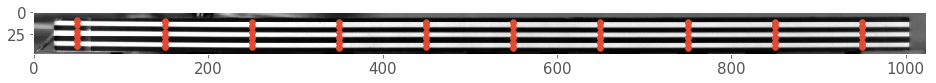

In [14]:
plt.imshow(reference_image, cmap='gray')
plt.scatter(inds[:, 1], inds[:, 0])
plt.grid(False)

In [15]:
# displacements = pysof.calc_displacements(file, points=inds)

## Frequency Response Functions

## Modal Analysis